In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from spl.generators import SSPGenerator

In [2]:
device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
d_range = np.arange(1, 512, 2)
num_repeats = 500

cos_sim = nn.CosineSimilarity(dim=0, eps=1e-6)

In [3]:
avg_similarities = np.zeros((d_range.shape[0], num_repeats))

for i, d in enumerate(d_range):
    for j in range(num_repeats):
        ssp_gen = SSPGenerator(
            dimensionality=d,
            device=device,
        )
        ssp = ssp_gen.generate(2)

        avg_similarities[i, j] = cos_sim(ssp[0], ssp[1]).item()

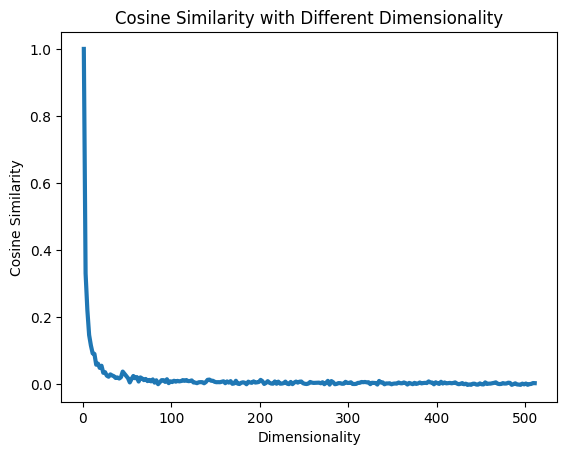

In [6]:
plt.plot(d_range, np.mean(avg_similarities, axis=1), linewidth=3)
plt.xlabel('Dimensionality')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity with Different Dimensionality')
plt.savefig('cosine_similarity_with_dimensionality.png', dpi=500)